In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px ## World Map

In [53]:
df=pd.read_csv("bit.csv")
df.head()

,date,population
0,06-04-2022,7
1,07-07-2022,6
2,15-08-2022,10
3,16-10-2022,12
4,02-11-2003,7


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        8 non-null      object
 1   population  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [55]:
df.isnull().sum()

date          0
population    0
dtype: int64

In [56]:
df["date"]= pd.to_datetime(df["date"])

<ipython-input-56-082167ba8dcc>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df["date"]= pd.to_datetime(df["date"])


In [57]:
 !pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from prophet import Prophet

In [63]:
population=df.groupby('date')['population'].sum().reset_index()

In [64]:
population.rename(columns={"date":"ds","population":"y"},inplace=True)

In [65]:
model=Prophet(interval_width=0.95)

In [66]:
model.fit(population)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqki2d_87/81w7zoz1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqki2d_87/mu1b24jp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66520', 'data', 'file=/tmp/tmpqki2d_87/81w7zoz1.json', 'init=/tmp/tmpqki2d_87/mu1b24jp.json', 'output', 'file=/tmp/tmpqki2d_87/prophet_model4hukqwi0/prophet_model-20230421061318.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:13:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:13:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cm

In [67]:
future_dates=model.make_future_dataframe(periods=30)

In [68]:
forecast=model.predict(future_dates)

           ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2003-02-02 -41.083080    8.000276    8.000276   -41.083080   -41.083080   
1  2003-02-11 -41.049874    7.000189    7.000189   -41.049874   -41.049874   
2  2003-02-19 -41.020885    9.000131    9.000131   -41.020885   -41.020885   
3  2003-03-12 -40.944790    6.000051    6.000051   -40.944790   -40.944790   
4  2022-06-04 -15.492712    6.999672    6.999672   -15.492712   -15.492712   
5  2022-07-07 -15.373133    5.999669    5.999669   -15.373133   -15.373133   
6  2022-08-15 -15.231814    9.999928    9.999928   -15.231814   -15.231814   
7  2022-10-16 -15.007151   12.000189   12.000189   -15.007151   -15.007151   
8  2022-10-17 -15.003528  -18.395892  -18.395892   -15.003528   -15.003528   
9  2022-10-18 -14.999904  -43.395204  -43.395204   -14.999904   -14.999904   
10 2022-10-19 -14.996280  -62.599778  -62.599778   -14.996280   -14.996280   
11 2022-10-20 -14.992657  -75.772292  -75.772292   -14.992657   

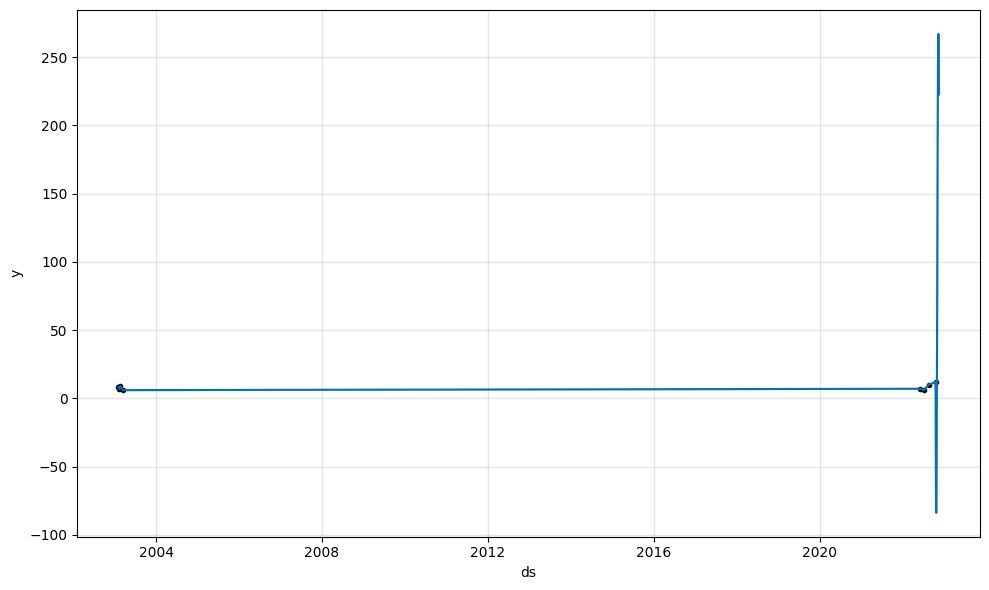

In [69]:
model.plot(forecast)
print(forecast)

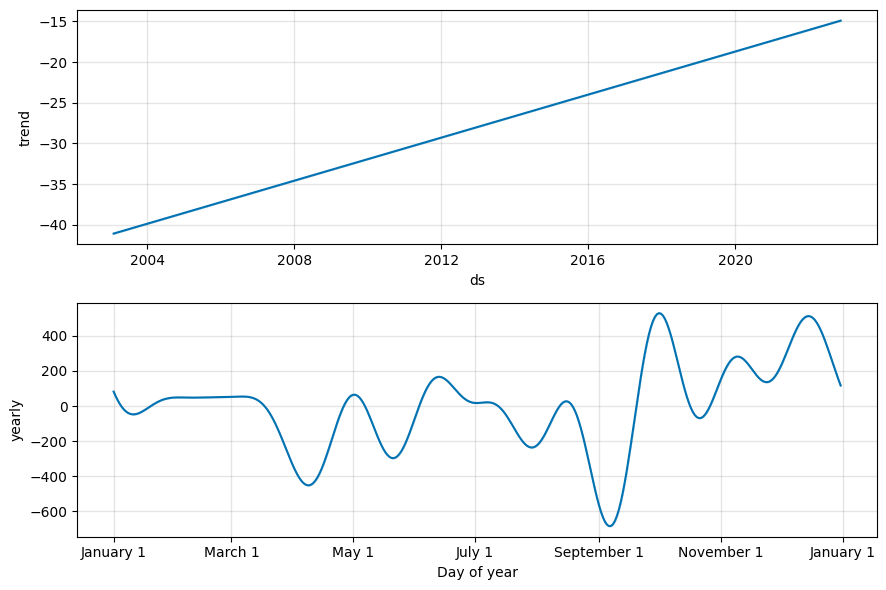

In [70]:
component=model.plot_components(forecast)

In [74]:
model1=Prophet(interval_width=0.95)

In [75]:
model1.fit(population)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqki2d_87/geova2nh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqki2d_87/6sx7h_0l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31186', 'data', 'file=/tmp/tmpqki2d_87/geova2nh.json', 'init=/tmp/tmpqki2d_87/6sx7h_0l.json', 'output', 'file=/tmp/tmpqki2d_87/prophet_modelnzvmkl_6/prophet_model-20230421061357.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:13:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:13:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cm

In [76]:
future_dates=model1.make_future_dataframe(periods=10)

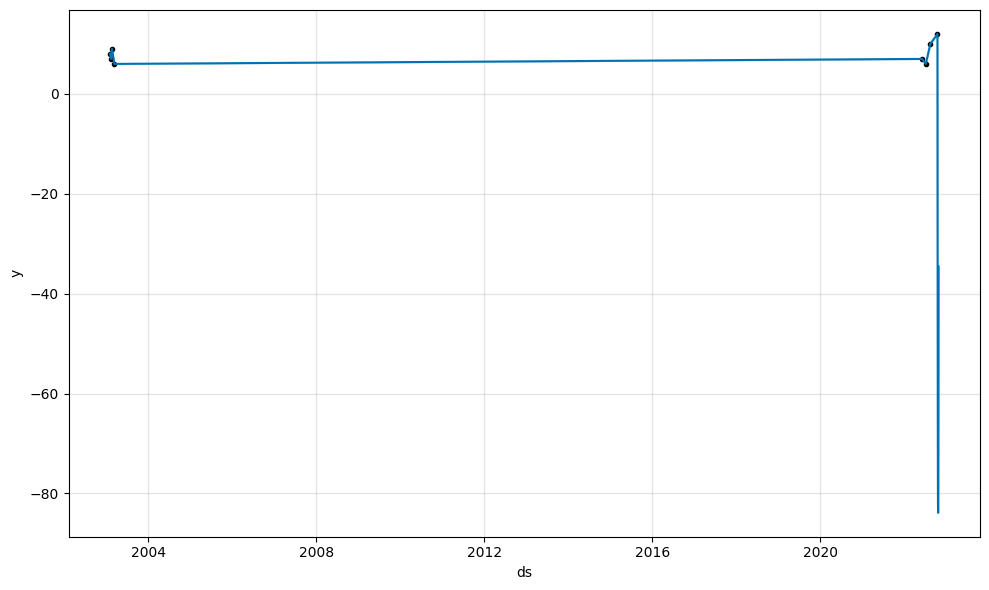

In [77]:
forecasting=model.predict(future_dates)
ploting=model.plot(forecasting)

           ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2003-02-02 -41.083080    8.000276    8.000276   -41.083080   -41.083080   
1  2003-02-11 -41.049874    7.000189    7.000189   -41.049874   -41.049874   
2  2003-02-19 -41.020885    9.000131    9.000131   -41.020885   -41.020885   
3  2003-03-12 -40.944790    6.000051    6.000051   -40.944790   -40.944790   
4  2022-06-04 -15.492712    6.999672    6.999672   -15.492712   -15.492712   
5  2022-07-07 -15.373133    5.999669    5.999669   -15.373133   -15.373133   
6  2022-08-15 -15.231814    9.999928    9.999928   -15.231814   -15.231814   
7  2022-10-16 -15.007151   12.000189   12.000189   -15.007151   -15.007151   
8  2022-10-17 -15.003528  -18.395892  -18.395892   -15.003528   -15.003528   
9  2022-10-18 -14.999904  -43.395204  -43.395204   -14.999904   -14.999904   
10 2022-10-19 -14.996280  -62.599778  -62.599778   -14.996280   -14.996280   
11 2022-10-20 -14.992657  -75.772292  -75.772292   -14.992657   

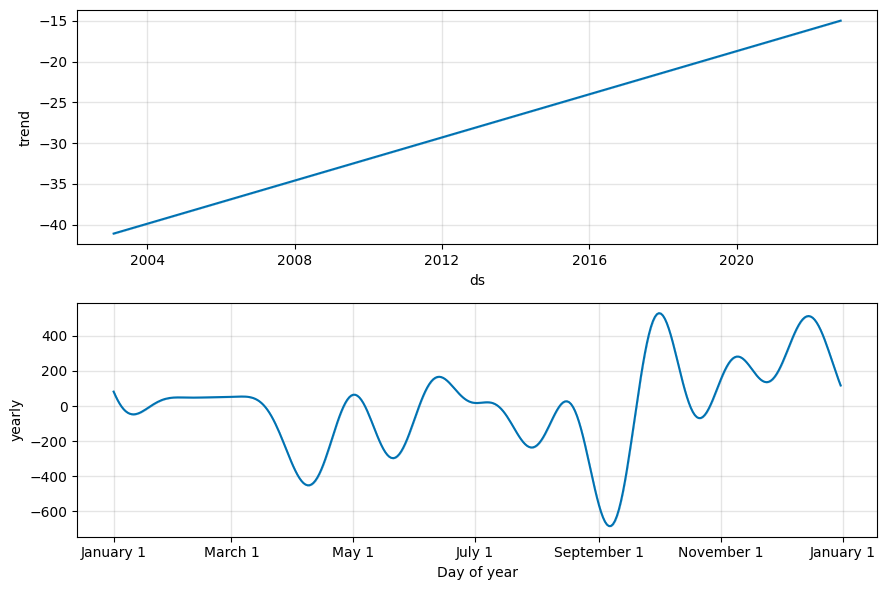

In [78]:
week=model1.plot_components(forecasting)
print(forecasting)